In [1]:
from GameweekStats import GameweekStats

import seaborn as sns

import requests

In [2]:
# Credits: https://towardsdatascience.com/fantasy-premier-league-value-analysis-python-tutorial-using-the-fpl-api-8031edfe9910

url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

r = requests.get(url)
json = r.json()
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

# Loop through events key

- Display the column names
- Filter column names that will be useful
- Use data until the most recent gameweek
- Plot the highest and average scores

In [3]:
useful_columns = ['id','average_entry_score','highest_score','chip_plays','most_selected',
                  'most_transferred_in','top_element','top_element_info','transfers_made',
                  'most_captained','most_vice_captained','is_current']

gameweek_stats = GameweekStats(json['events'], useful_columns)
gameweek_stats.filter()

   id             Category  Scores
0   1  average_entry_score    50.0
1   2  average_entry_score    59.0
2   3  average_entry_score    43.0
3   4  average_entry_score    48.0
4   5  average_entry_score    60.0
5   1        highest_score   142.0
6   2        highest_score   165.0
7   3        highest_score   119.0
8   4        highest_score   160.0
9   5        highest_score   136.0


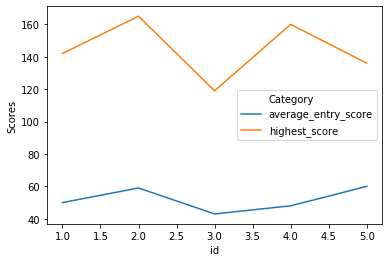

In [13]:
scores_df = gameweek_stats.fetch_scores()

scores_df = scores_df.melt('id', var_name='Category',  value_name='Scores')

sns.lineplot(data=scores_df, x='id', y='Scores', hue='Category')